In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import re
from collections import Counter

In [2]:
driver = webdriver.Chrome(service = Service(executable_path = '/chromedriver_win32/chromedriver'))
driver.maximize_window()
wait = WebDriverWait(driver, 10)

In [3]:
driver.get('https://www.instagram.com/')

username = wait.until(EC.presence_of_element_located((By.NAME, 'username')))
username.clear()
username.send_keys('username')

password = wait.until(EC.presence_of_element_located((By.NAME, 'password')))
password.clear()
password.send_keys('password')

password.submit()
time.sleep(5)

**Q1.1** From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers.

TOP 10 SEARCH RESULTS FOR "food" :
----------------------------------
foodtalkindia
jamshedpurfoodieduo
foodrooaster
_food_prints
foodie_girl_vivu
foodpictorial_
food
ek_jharkhandwala
dilsefoodie
foodie_incarnate

FETCHING FOLLOWERS COUNT :
--------------------------
OPENED PROFILE OF "foodtalkindia" | FOLLOWERS ->  309517
OPENED PROFILE OF "jamshedpurfoodieduo" | FOLLOWERS ->  22515
OPENED PROFILE OF "foodrooaster" | FOLLOWERS ->  105364
OPENED PROFILE OF "_food_prints" | FOLLOWERS ->  8005
OPENED PROFILE OF "foodie_girl_vivu" | FOLLOWERS ->  4769
OPENED PROFILE OF "foodpictorial_" | FOLLOWERS ->  1103
OPENED PROFILE OF "food" | FOLLOWERS ->  183083
OPENED PROFILE OF "ek_jharkhandwala" | FOLLOWERS ->  75157
OPENED PROFILE OF "dilsefoodie" | FOLLOWERS ->  1084810
OPENED PROFILE OF "foodie_incarnate" | FOLLOWERS ->  1451103

TOP 5 HANDLES :
---------------
foodie_incarnate -> 1451103
dilsefoodie -> 1084810
foodtalkindia -> 309517
food -> 183083
foodrooaster -> 105364



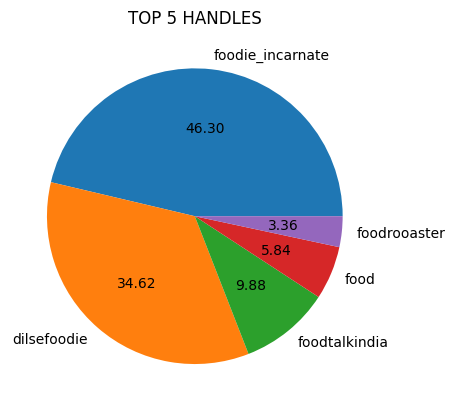

In [4]:
try:
    driver.find_element(By.CLASS_NAME, '_aaw6')
except:
    search_btn = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//a[@class = "x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _a6hd"]')))[2]
    search_btn.click()

search_textbox = wait.until(EC.presence_of_element_located((By.TAG_NAME, 'input')))
search_textbox.clear()
search_textbox.send_keys('food')

handles = wait.until(EC.presence_of_all_elements_located((By.XPATH, '//span[@class = "x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]')))
handles = handles[:10]

handle_names = []
print('TOP 10 SEARCH RESULTS FOR "food" :')
print('----------------------------------')
for h in handles:
    handle_names.append(h.get_attribute('innerHTML'))
    print(handle_names[-1])

print('\nFETCHING FOLLOWERS COUNT :')
print('--------------------------')
num_followers = {}
for username in handle_names:
    driver.get('https://www.instagram.com/'+username+'/')
    followers_btn =  wait.until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, 'follower')))
    print('OPENED PROFILE OF "{}"'.format(username), end=' | ')
    num = BeautifulSoup(followers_btn.find_element(By.XPATH, 'span/span').get_attribute('outerHTML'), 'html.parser').find('span').get('title')
    num = int(num.replace(',', ''))
    print('FOLLOWERS -> ', num)
    num_followers[username] = num

top5 = [k for k in sorted(num_followers, key=num_followers.get, reverse=True)[:5]]
print('\nTOP 5 HANDLES :')
print('---------------')
for user in top5:
    print(user, '->', num_followers[user])

usernames = []
follower_nums = []
for user in top5:
    usernames.append(user)
    follower_nums.append(num_followers[user])

print()
plt.title('TOP 5 HANDLES')
plt.pie(follower_nums, labels=usernames, autopct="%.2f")
plt.show()

**Q1.2** Now Find the number of posts these handles have done in the previous 3 days.

In [5]:
print('\nFETCHING NUMBER OF POSTS :')
print('--------------------------')
num_of_posts = {}

for username in top5:
    driver.get('https://www.instagram.com/'+username+'/')
    post = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = "_aabd _aa8k  _al3l"]')))
    print('OPENED PROFILE OF "{}"'.format(username), end=' | ')
    post.click()

    num = 0
    while True:
        time_of_post = WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,"//time[@class='_aaqe']")))
        date_of_post = BeautifulSoup(time_of_post.get_attribute('outerHTML'),'html.parser').find('time').get('title')
        date_of_post = date_of_post.replace(',', '')
        post_date = datetime.strptime(date_of_post, '%b %d %Y').date()
        current_date = datetime.today().strftime('%Y-%m-%d')
        current_date = datetime.strptime(current_date, '%Y-%m-%d').date()
        difference_in_date = (current_date-post_date).days

        if difference_in_date > 3:
            break

        num += 1
        next_btn = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]')))
        next_btn.click()
    
    print('NUMBER OF POSTS -> ', num)
    num_of_posts[username] = num

print('\nNUMBER OF POSTS (PAST 3 DAYS):')
print('------------------------------')
for user in num_of_posts:
    print(user, '->', num_of_posts[user])



FETCHING NUMBER OF POSTS :
--------------------------
OPENED PROFILE OF "foodie_incarnate" | NUMBER OF POSTS ->  1
OPENED PROFILE OF "dilsefoodie" | NUMBER OF POSTS ->  5
OPENED PROFILE OF "foodtalkindia" | NUMBER OF POSTS ->  5
OPENED PROFILE OF "food" | NUMBER OF POSTS ->  0
OPENED PROFILE OF "foodrooaster" | NUMBER OF POSTS ->  0

NUMBER OF POSTS (PAST 3 DAYS):
------------------------------
foodie_incarnate -> 1
dilsefoodie -> 5
foodtalkindia -> 5
food -> 0
foodrooaster -> 0


**Q1.3** Depict this information using a suitable graph.

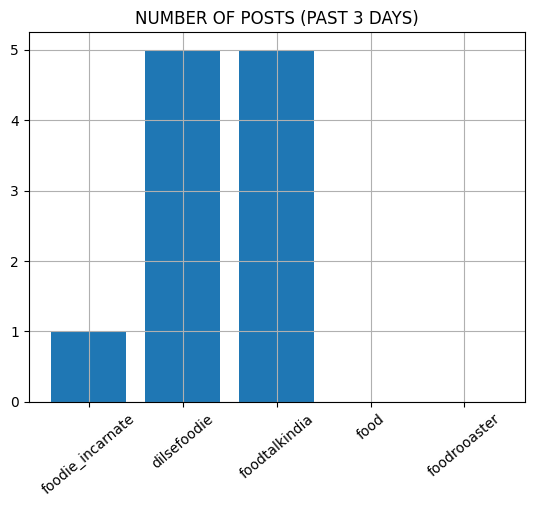

In [6]:
usernames = []
post_nums = []
for user in num_of_posts:
    usernames.append(user)
    post_nums.append(num_of_posts[user])

plt.title('NUMBER OF POSTS (PAST 3 DAYS)')
plt.bar(usernames, post_nums)
plt.xticks(rotation=40)
plt.grid()
plt.show()

**Q2.1** Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.<br>
**Q2.2** Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [7]:
print('\nFETCHING WORD FREQUENCY :')
print('-------------------------')
all_words = []

for username in top5:
    driver.get('https://www.instagram.com/'+username+'/')
    post = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = "_aabd _aa8k  _al3l"]')))
    print('OPENED PROFILE OF "{}"'.format(username), end=' | ')
    post.click()

    num = 1
    print('POST NUM : ', end='')
    while (num <= 10):
        print('->{}'.format(num), end='')
        caption = wait.until(EC.presence_of_element_located((By.XPATH, '//ul[@class="_a9z6 _a9za"]//li//h1')))
        text = BeautifulSoup(caption.get_attribute('outerHTML'),'html.parser').find('h1').text
        text = text.lower()
        text = text.replace('.', ' ')
        text = text.replace('#', ' #')

        words = [word.strip() for word in text.split(' ')]
        words = [word for word in words if word != '']
        all_words.extend(words)

        num += 1
        next_btn = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]')))
        next_btn.click()
    print()


FETCHING WORD FREQUENCY :
-------------------------
OPENED PROFILE OF "foodie_incarnate" | POST NUM : ->1->2->3->4->5->6->7->8->9->10
OPENED PROFILE OF "dilsefoodie" | POST NUM : ->1->2->3->4->5->6->7->8->9->10
OPENED PROFILE OF "foodtalkindia" | POST NUM : ->1->2->3->4->5->6->7->8->9->10
OPENED PROFILE OF "food" | POST NUM : ->1->2->3->4->5->6->7->8->9->10
OPENED PROFILE OF "foodrooaster" | POST NUM : ->1->2->3->4->5->6->7->8->9->10


**Q2.3** Create a csv file with two columns : the word and its frequency.

In [8]:
word_dict = Counter(all_words)
word_n = [ w for w,f in word_dict.items()]
word_f = [ f for w,f in word_dict.items()]

columns = {"WORD":word_n, "FREQUENCY":word_f}
words_df = pd.DataFrame(columns)
words_df.to_csv('WordFrequency.csv', index=False)

tag_dict = Counter([tag for tag in all_words if tag[0] == '#'])
tag_n = [ w for w,f in tag_dict.items()]
tag_f = [ f for w,f in tag_dict.items()]

columns = {"HASHTAG":tag_n, "FREQUENCY":tag_f}
words_df = pd.DataFrame(columns)
words_df.to_csv('HashtagFrequency.csv', index=False)

**Q2.4** Now, find the hashtags that were most popular among these bloggers

In [9]:
hashtags = [tag for tag in all_words if tag[0] == '#']
word_frequency = Counter(hashtags)

top5_tags = [k for k in sorted(word_frequency, key=word_frequency.get, reverse=True)[:5]]
print('\nTOP 5 HASHTAGS :')
print('---------------')
for tag in top5_tags:
    print(tag, '->', word_frequency[tag])

hashtags = []
frequency = []
for tag in top5_tags:
    hashtags.append(tag)
    frequency.append(word_frequency[tag])



TOP 5 HASHTAGS :
---------------
#food -> 19
#delhi -> 16
#foodblogger -> 13
#yummy -> 13
#foodtalkindia -> 10


**Q2.5** Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

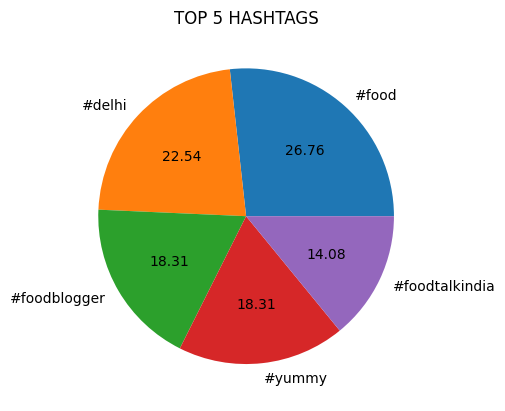

In [10]:
plt.title('TOP 5 HASHTAGS')
plt.pie(frequency, labels=hashtags, autopct="%.2f")
plt.show()

**Q3.1** Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [11]:
print('\nFETCHING LIKES :')
print('----------------')
total_likes = {}

for username in top5:
    driver.get('https://www.instagram.com/'+username+'/')
    post = wait.until(EC.presence_of_element_located((By.XPATH, '//div[@class = "_aabd _aa8k  _al3l"]')))
    print('OPENED PROFILE OF "{}"'.format(username), end=' | ')
    post.click()

    like_counter = 0
    num = 1
    print('POST NUM : ', end='')
    while (num <= 10):
        print('->{}'.format(num), end='')

        likes = wait.until(EC.presence_of_element_located((By.XPATH, '//section[@class="_ae5m _ae5n _ae5o"]//span//span')))
        num_likes = BeautifulSoup(likes.get_attribute('outerHTML'), 'html.parser').find('span').text
        try:
            num_likes = int(num_likes.replace(',', ''))
        except:
            num_likes = 0
        
        like_counter += num_likes

        num += 1
        next_btn = wait.until(EC.presence_of_element_located((By.XPATH,'//div[@class=" _aaqg _aaqh"]')))
        next_btn.click()

    total_likes[username] = like_counter
    print()


FETCHING LIKES :
----------------
OPENED PROFILE OF "foodie_incarnate" | POST NUM : ->1->2->3->4->5->6->7->8->9->10
OPENED PROFILE OF "dilsefoodie" | POST NUM : ->1->2->3->4->5->6->7->8->9->10
OPENED PROFILE OF "foodtalkindia" | POST NUM : ->1->2->3->4->5->6->7->8->9->10
OPENED PROFILE OF "food" | POST NUM : ->1->2->3->4->5->6->7->8->9->10
OPENED PROFILE OF "foodrooaster" | POST NUM : ->1->2->3->4->5->6->7->8->9->10



TOTAL LIKES :
-------------
foodie_incarnate -> 198919
dilsefoodie -> 110620
foodtalkindia -> 6143
food -> 1417
foodrooaster -> 576401


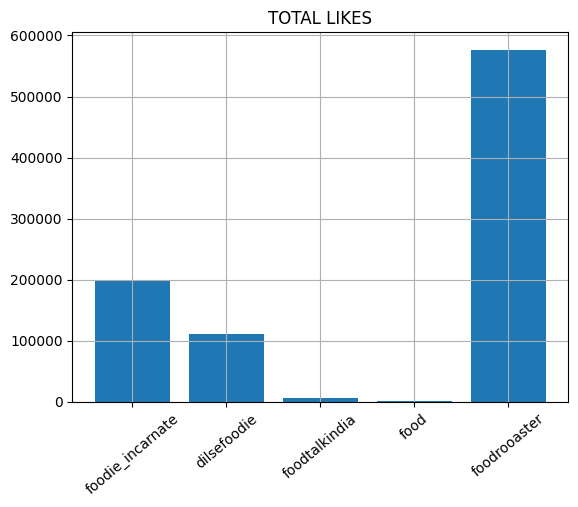

In [12]:
print('\nTOTAL LIKES :')
print('-------------')
for user in total_likes:
    print(user, '->', total_likes[user])

usernames = []
for user in total_likes:
    usernames.append(user)
    
t_like_val = []
for user in usernames:
    t_like_val.append(total_likes[user])

plt.title('TOTAL LIKES')
plt.bar(usernames, t_like_val)
plt.xticks(rotation=40)
plt.grid()
plt.show()

**Q3.2** Calculate the average likes for a handle.

AVERAGE LIKES :
--------------
foodie_incarnate -> 19891.9
dilsefoodie -> 11062.0
foodtalkindia -> 614.3
food -> 141.7
foodrooaster -> 57640.1


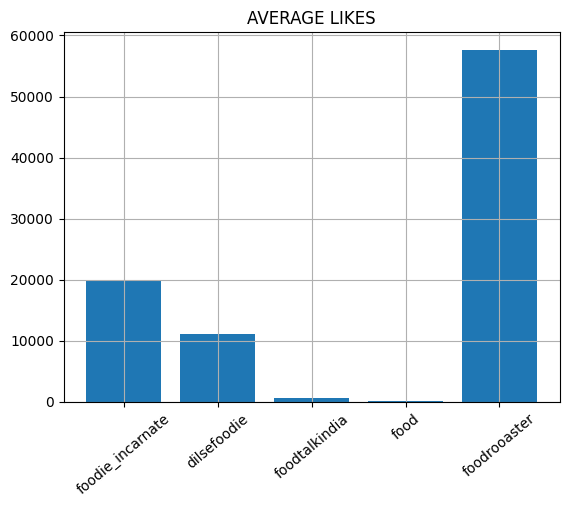

In [13]:
avg_likes = {k:total_likes[k]/10 for k in total_likes}
print('AVERAGE LIKES :')
print('--------------')
for user in avg_likes:
    print(user, '->', avg_likes[user])
    
a_like_val = []
for user in usernames:
    a_like_val.append(avg_likes[user])

plt.title('AVERAGE LIKES')
plt.bar(usernames, a_like_val)
plt.xticks(rotation=40)
plt.grid()
plt.show()

**Q3.3** Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.<br>
**Q3.4** Create a bar graph to depict the above obtained information.

AVERAGE FOLLOWERS:LIKES RATIO :
-------------------------------
foodie_incarnate -> 1451103 : 19891.9 ( 72.95 )
dilsefoodie -> 1084810 : 11062.0 ( 98.07 )
foodtalkindia -> 309517 : 614.3 ( 503.85 )
food -> 183083 : 141.7 ( 1292.05 )
foodrooaster -> 105364 : 57640.1 ( 1.83 )


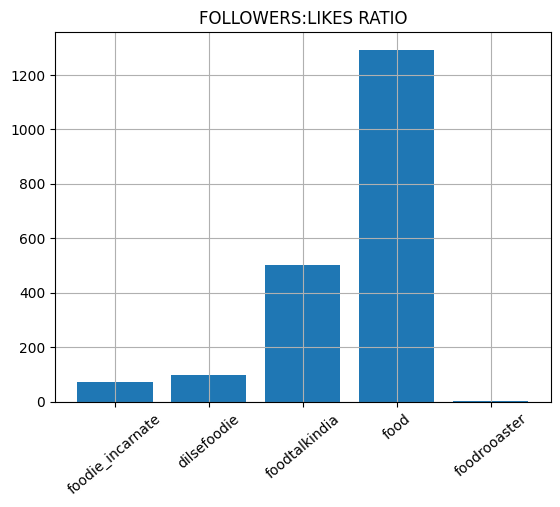

In [14]:
fl_ratio = {k:num_followers[k]/avg_likes[k] for k in total_likes}
print('AVERAGE FOLLOWERS:LIKES RATIO :')
print('-------------------------------')
for user in total_likes:
    print(user, '->', num_followers[user], ':', total_likes[user]/10, '(', '%.2f'%fl_ratio[user], ')')
    
fl_ratio_val = []
for user in usernames:
    fl_ratio_val.append(fl_ratio[user])

plt.title('FOLLOWERS:LIKES RATIO')
plt.bar(usernames, fl_ratio_val)
plt.xticks(rotation=40)
plt.grid()
plt.show()

In [15]:
driver.close()